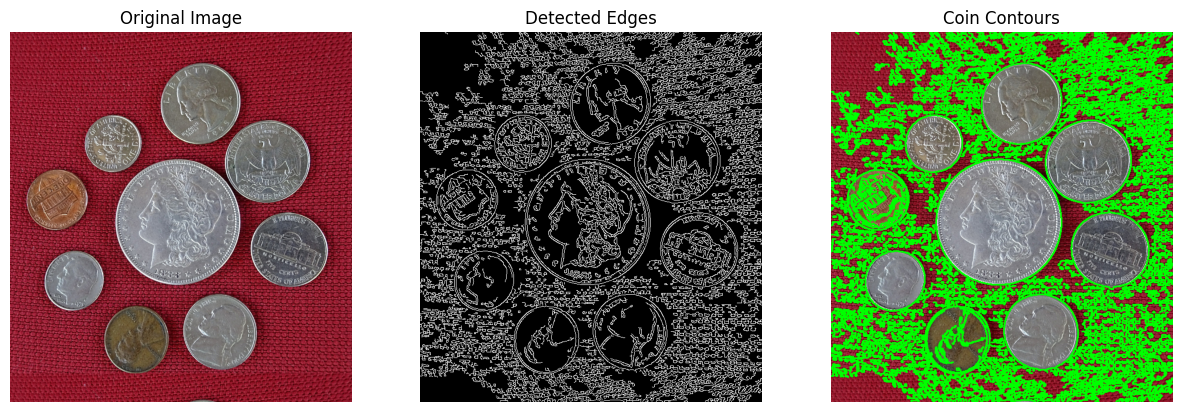

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Correct image path
image_path = "CoinsA.png"

# --- Step 1: Preprocessing ---
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    return blurred

# --- Step 2: Edge and Contour Detection ---
def detect_coin_edges(preprocessed, original):
    kernel = np.ones((3, 3), np.uint8)

    # Closing to fill gaps
    morph = cv2.morphologyEx(preprocessed, cv2.MORPH_CLOSE, kernel)

    # Canny edge detection
    edges = cv2.Canny(morph, 30, 100)

    # Find external contours (coins)
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on original image
    result = original.copy()
    cv2.drawContours(result, contours, -1, (0, 255, 0), 2)
    return result, edges

# --- Step 3: Display Results ---
def present_results(original_image, processed_image, edges):
    original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    processed_rgb = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(15, 6))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_rgb)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Detected Edges")
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Coin Contours")
    plt.imshow(processed_rgb)
    plt.axis('off')

    plt.show()

# --- Step 4: Main Execution ---
image = cv2.imread(image_path)

if image is None:
    print("❌ Error: Image not found. Check the file name.")
else:
    preprocessed = preprocess_image(image)
    coin_detected_image, edges = detect_coin_edges(preprocessed, image)
    present_results(image, coin_detected_image, edges)


#